In [2]:
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # To make some plots
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import os
for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

mnist_df = pd.read_csv('dataset/train.csv')
mnist_df.head()

dataset/archive.zip
dataset/train.csv


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist_df.shape[0]

42000

In [4]:
mnist_df.isnull().sum().max()

0

In [5]:
label_list = mnist_df["label"].unique()
label_list.sort()
print('labels are :',label_list)

labels are : [0 1 2 3 4 5 6 7 8 9]


<AxesSubplot:xlabel='label', ylabel='count'>

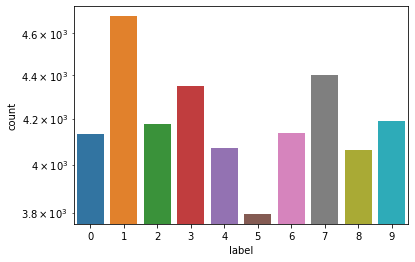

In [6]:
sns.countplot(x ='label', data = mnist_df, log = True)

In [7]:
(X_dev, Y_dev), (X_train, Y_train) = keras.datasets.mnist.load_data()
X_train[0].shape

(28, 28)

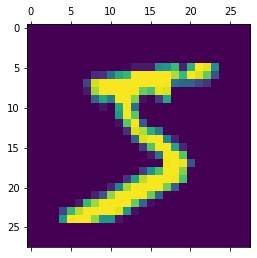

In [8]:
plt.matshow(X_dev[0])

In [9]:
X_dev[7].shape

(28, 28)

In [10]:
X_dev_std = X_dev/255
Y_dev_cat = to_categorical(Y_dev)
X_dev_std_reshaped = X_dev_std.reshape(len(X_dev_std), 28*28)

X_train_std = X_train/255
Y_train_cat = to_categorical
X_train_std_reshaped = X_train_std.reshape(len(X_train_std), 28*28)

X_train_std.shape

(10000, 28, 28)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(X_train_std_reshaped, Y_train, epochs = 10)

Epoch 1/10
313/313 [==============================] - 1s 943us/step - loss: 0.8877 - accuracy: 0.7859
Epoch 2/10
313/313 [==============================] - 0s 897us/step - loss: 0.4283 - accuracy: 0.8909
Epoch 3/10
313/313 [==============================] - 0s 897us/step - loss: 0.3506 - accuracy: 0.9075
Epoch 4/10
313/313 [==============================] - 0s 900us/step - loss: 0.3137 - accuracy: 0.9168
Epoch 5/10
313/313 [==============================] - 0s 959us/step - loss: 0.2901 - accuracy: 0.9210
Epoch 6/10
313/313 [==============================] - 0s 962us/step - loss: 0.2736 - accuracy: 0.9245
Epoch 7/10
313/313 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.9273
Epoch 8/10
313/313 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.9309
Epoch 9/10
313/313 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.9320
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.2331 - accu

In [13]:
model.evaluate(X_train_std_reshaped, Y_train)

313/313 [==============================] - 0s 839us/step - loss: 0.2215 - accuracy: 0.9385


[0.2215263694524765, 0.9384999871253967]

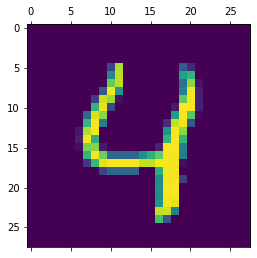

In [14]:
plt.matshow(X_train[4])

In [17]:
y_predicted = model.predict(X_train_std_reshaped)
py.argmax(y_predicted[4])

4

In [16]:
from sklearn.model_selection import train_test_split
X_dev, X_train, y_dev, y_train = train_test_split(label_list.data, label_list.target, test_size=0.25,random_state=123) # 75% training and 25% test

AttributeError: 'numpy.ndarray' object has no attribute 'target'